In [81]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit


data = pd.read_csv('hepatitis.csv')


In [82]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [83]:
data['steroid'].fillna(data['steroid'].mode()[0], inplace = True)
data['fatigue'].fillna(data['fatigue'].mode()[0], inplace = True)
data['malaise'].fillna(data['malaise'].mode()[0], inplace = True)
data['anorexia'].fillna(data['anorexia'].mode()[0], inplace = True)
data['liver_big'].fillna(data['liver_big'].mode()[0], inplace = True)
data['liver_firm'].fillna(data['liver_firm'].mode()[0], inplace = True)
data['spleen_palpable'].fillna(data['spleen_palpable'].mode()[0], inplace = True)
data['spiders'].fillna(data['spiders'].mode()[0], inplace = True)
data['ascites'].fillna(data['ascites'].mode()[0], inplace = True)
data['varices'].fillna(data['varices'].mode()[0], inplace = True)

data['bilirubin'].fillna(data['bilirubin'].mean(), inplace = True)
data['alk_phosphate'].fillna(data['alk_phosphate'].mean(), inplace = True)
data['sgot'].fillna(data['sgot'].mean(), inplace = True)
data['protime'].fillna(data['protime'].mean(), inplace = True)
data['histology'].fillna(data['histology'].mode()[0], inplace = True)

data['albumin'].fillna(data['albumin'].mean(), inplace = True)

In [84]:
hepatitis_df = data
df=data

In [85]:
le = preprocessing.LabelEncoder()
hepatitis_df['sex'] = le.fit_transform(hepatitis_df['sex'])
hepatitis_df['steroid'] = le.fit_transform(hepatitis_df['steroid'])
hepatitis_df['antivirals'] = le.fit_transform(hepatitis_df['antivirals'])
hepatitis_df['fatigue'] = le.fit_transform(hepatitis_df['fatigue'])
hepatitis_df['malaise'] = le.fit_transform(hepatitis_df['malaise'])
hepatitis_df['anorexia'] = le.fit_transform(hepatitis_df['anorexia'])
hepatitis_df['liver_big'] = le.fit_transform(hepatitis_df['liver_big'])
hepatitis_df['liver_firm'] = le.fit_transform(hepatitis_df['liver_firm'])
hepatitis_df['spleen_palpable'] = le.fit_transform(hepatitis_df['spleen_palpable'])
hepatitis_df['spiders'] = le.fit_transform(hepatitis_df['spiders'])
hepatitis_df['varices'] = le.fit_transform(hepatitis_df['varices'])
hepatitis_df['ascites'] = le.fit_transform(hepatitis_df['ascites'])
hepatitis_df['histology'] = le.fit_transform(hepatitis_df['histology'])
hepatitis_df['class'] = le.fit_transform(hepatitis_df['class'])

In [86]:
hepatitis_df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.000000,18.0,4.0,61.852273,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.000000,42.0,3.5,61.852273,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.000000,32.0,4.0,61.852273,0,1
3,31,0,1,1,0,0,0,1,0,0,0,0,0,0.7,46.000000,52.0,4.0,80.000000,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,105.325397,200.0,4.0,61.852273,0,1


In [87]:
hepatitis_df.corr()['class']

age               -0.219647
sex                0.173051
steroid            0.137413
antivirals         0.130196
fatigue           -0.306049
malaise           -0.339530
anorexia          -0.133638
liver_big         -0.093665
liver_firm        -0.020057
spleen_palpable   -0.234261
spiders           -0.389137
ascites           -0.469334
varices           -0.362385
bilirubin         -0.450470
alk_phosphate     -0.141005
sgot              -0.075579
albumin            0.465827
protime            0.307238
histology         -0.337856
class              1.000000
Name: class, dtype: float64

In [90]:
test_data = pd.DataFrame(hepatitis_df['class'])
train_data = hepatitis_df.drop(['class'], axis=1)

hp_xtrain, hp_xtest, hp_ytrain, hp_ytest = train_test_split(train_data, test_data, test_size=0.2)



# Running Decision Tree  Model

In [91]:
classifier = DecisionTreeClassifier()  
classifier.fit(hp_xtrain, hp_ytrain) 
y_pred = classifier.predict(hp_xtest)  
print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
print(confusion_matrix(hp_ytest, y_pred))  
print(classification_report(hp_ytest, y_pred))  

Accuracy: 0.677419354839
[[ 7  7]
 [ 3 14]]
             precision    recall  f1-score   support

          0       0.70      0.50      0.58        14
          1       0.67      0.82      0.74        17

avg / total       0.68      0.68      0.67        31



Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  2
Accuracy: 0.677419354839
[[ 8  6]
 [ 4 13]]


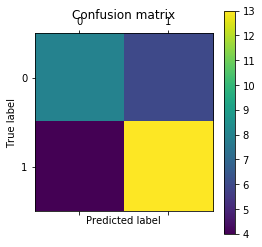



             precision    recall  f1-score   support

          0       0.67      0.57      0.62        14
          1       0.68      0.76      0.72        17

avg / total       0.68      0.68      0.67        31



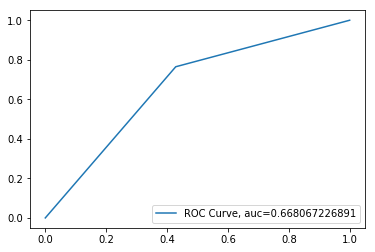

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  3
Accuracy: 0.838709677419
[[ 9  5]
 [ 0 17]]


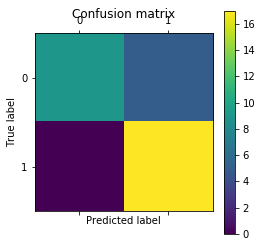



             precision    recall  f1-score   support

          0       1.00      0.64      0.78        14
          1       0.77      1.00      0.87        17

avg / total       0.88      0.84      0.83        31



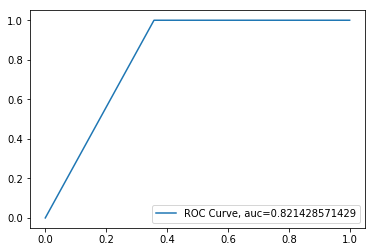

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  auto
Accuracy: 0.612903225806
[[ 4 10]
 [ 2 15]]


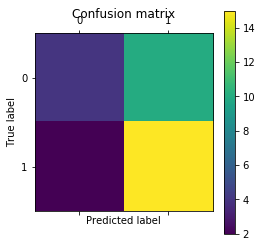



             precision    recall  f1-score   support

          0       0.67      0.29      0.40        14
          1       0.60      0.88      0.71        17

avg / total       0.63      0.61      0.57        31



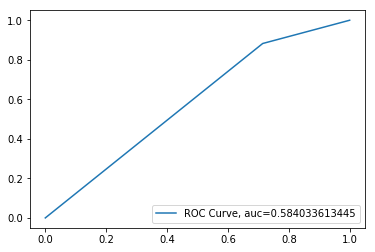

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  log2
Accuracy: 0.709677419355
[[ 6  8]
 [ 1 16]]


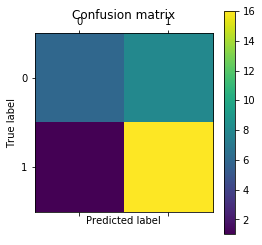



             precision    recall  f1-score   support

          0       0.86      0.43      0.57        14
          1       0.67      0.94      0.78        17

avg / total       0.75      0.71      0.69        31



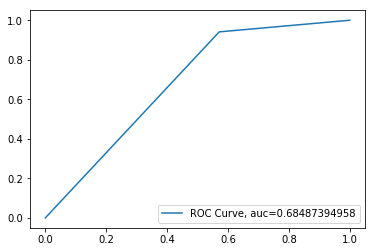

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  2
Accuracy: 0.677419354839
[[ 7  7]
 [ 3 14]]


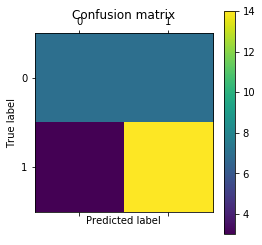



             precision    recall  f1-score   support

          0       0.70      0.50      0.58        14
          1       0.67      0.82      0.74        17

avg / total       0.68      0.68      0.67        31



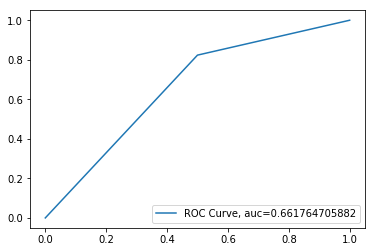

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  3
Accuracy: 0.548387096774
[[ 4 10]
 [ 4 13]]


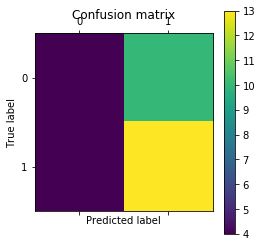



             precision    recall  f1-score   support

          0       0.50      0.29      0.36        14
          1       0.57      0.76      0.65        17

avg / total       0.54      0.55      0.52        31



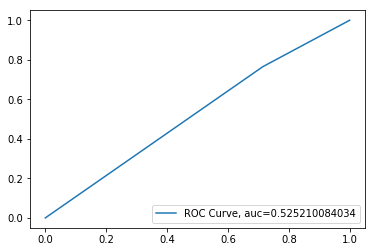

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  auto
Accuracy: 0.516129032258
[[ 4 10]
 [ 5 12]]


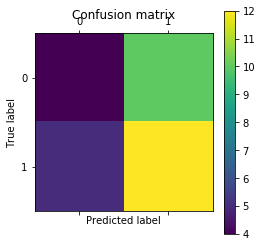



             precision    recall  f1-score   support

          0       0.44      0.29      0.35        14
          1       0.55      0.71      0.62        17

avg / total       0.50      0.52      0.49        31



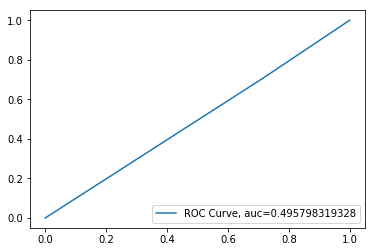

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  log2
Accuracy: 0.677419354839
[[ 7  7]
 [ 3 14]]


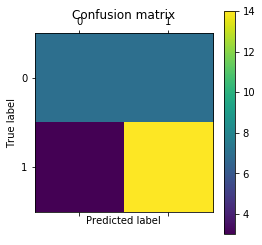



             precision    recall  f1-score   support

          0       0.70      0.50      0.58        14
          1       0.67      0.82      0.74        17

avg / total       0.68      0.68      0.67        31



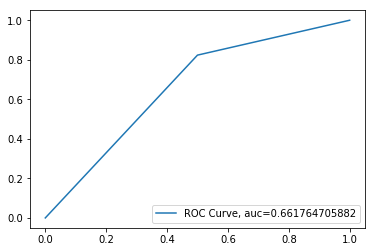

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  2
Accuracy: 0.677419354839
[[ 5  9]
 [ 1 16]]


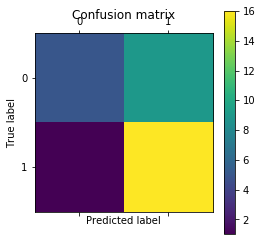



             precision    recall  f1-score   support

          0       0.83      0.36      0.50        14
          1       0.64      0.94      0.76        17

avg / total       0.73      0.68      0.64        31



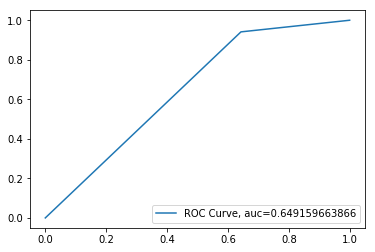

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  3
Accuracy: 0.548387096774
[[ 4 10]
 [ 4 13]]


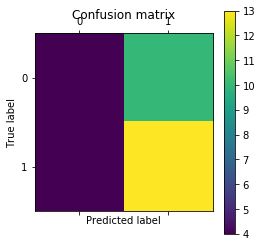



             precision    recall  f1-score   support

          0       0.50      0.29      0.36        14
          1       0.57      0.76      0.65        17

avg / total       0.54      0.55      0.52        31



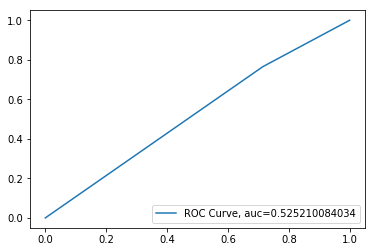

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  auto
Accuracy: 0.516129032258
[[ 5  9]
 [ 6 11]]


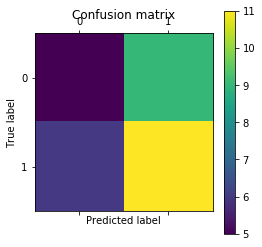



             precision    recall  f1-score   support

          0       0.45      0.36      0.40        14
          1       0.55      0.65      0.59        17

avg / total       0.51      0.52      0.51        31



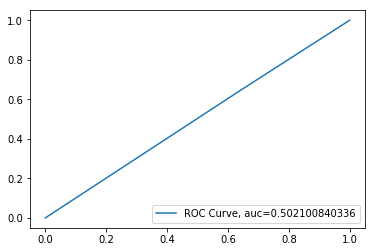

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  log2
Accuracy: 0.645161290323
[[ 5  9]
 [ 2 15]]


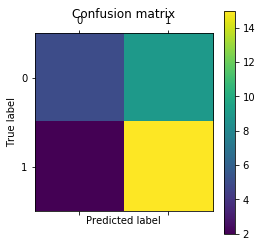



             precision    recall  f1-score   support

          0       0.71      0.36      0.48        14
          1       0.62      0.88      0.73        17

avg / total       0.67      0.65      0.62        31



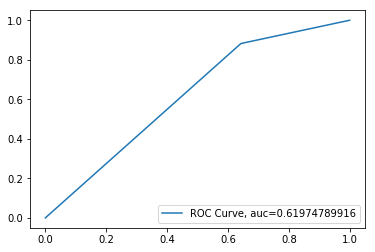

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  2
Accuracy: 0.645161290323
[[ 6  8]
 [ 3 14]]


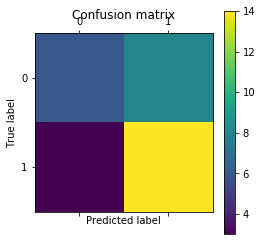



             precision    recall  f1-score   support

          0       0.67      0.43      0.52        14
          1       0.64      0.82      0.72        17

avg / total       0.65      0.65      0.63        31



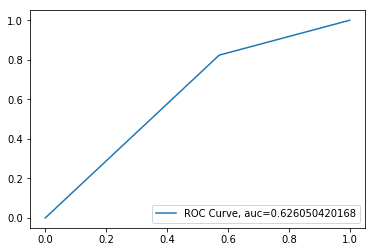

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  3
Accuracy: 0.58064516129
[[ 6  8]
 [ 5 12]]


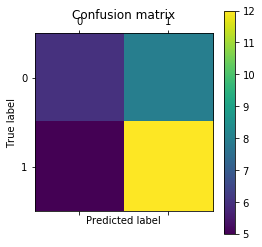



             precision    recall  f1-score   support

          0       0.55      0.43      0.48        14
          1       0.60      0.71      0.65        17

avg / total       0.58      0.58      0.57        31



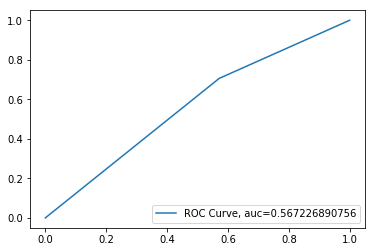

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  auto
Accuracy: 0.612903225806
[[ 6  8]
 [ 4 13]]


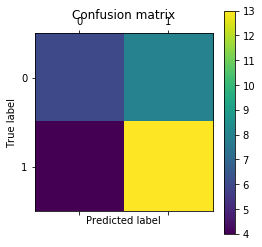



             precision    recall  f1-score   support

          0       0.60      0.43      0.50        14
          1       0.62      0.76      0.68        17

avg / total       0.61      0.61      0.60        31



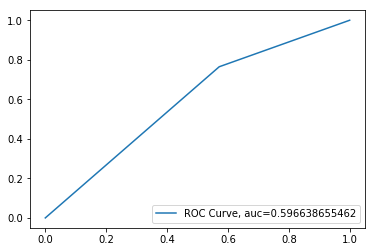

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  log2
Accuracy: 0.677419354839
[[ 5  9]
 [ 1 16]]


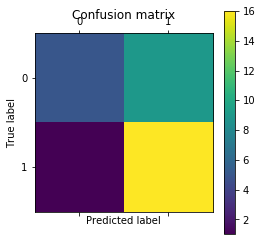



             precision    recall  f1-score   support

          0       0.83      0.36      0.50        14
          1       0.64      0.94      0.76        17

avg / total       0.73      0.68      0.64        31



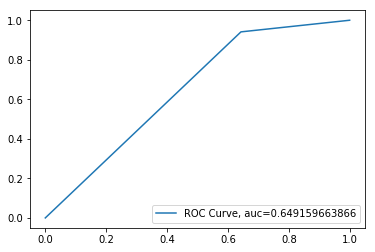

In [92]:
criteria = ['gini', 'entropy']
splitr = ['best', 'random']
weight = ['balanced']
feature = [2,3, 'auto', 'log2']
for i in criteria:
    for j in splitr:
        for k in weight:
            for l in feature:
                classifier = DecisionTreeClassifier(criterion =i,splitter=j ,class_weight=k, max_features =l)  
                classifier.fit(hp_xtrain, hp_ytrain) 
                y_pred = classifier.predict(hp_xtest)  
                print("Decision Tree : when  criteria = ", i,", splitter = ",j, ", class_weight = ", k,", max_features = ", l)
                print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
                cm = confusion_matrix(hp_ytest, y_pred)
                print(cm)
                plt.matshow(cm)
                plt.title('Confusion matrix')
                plt.colorbar()
                plt.ylabel('True label')
                plt.xlabel('Predicted label')
                plt.show()
                print('\n')
                
                print(classification_report(hp_ytest, y_pred))
                fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)
                auc = roc_auc_score(hp_ytest, y_pred)
                plt.plot(fpr,tpr,label="ROC Curve, auc="+str(auc))
                plt.legend(loc=4)
                plt.show()
                
        

# Standard Scaler

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(hp_xtrain)
hp_xtrn=scaler.transform(hp_xtrain)
hp_xtst=scaler.transform(hp_xtest)

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  2
Accuracy: 0.612903225806
[[ 7  7]
 [ 5 12]]


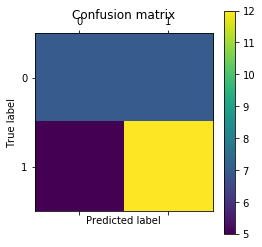



             precision    recall  f1-score   support

          0       0.58      0.50      0.54        14
          1       0.63      0.71      0.67        17

avg / total       0.61      0.61      0.61        31



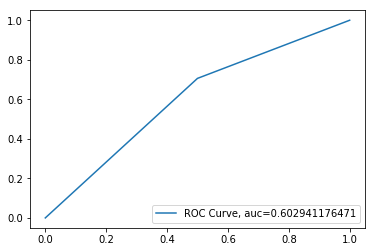

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  3
Accuracy: 0.806451612903
[[ 9  5]
 [ 1 16]]


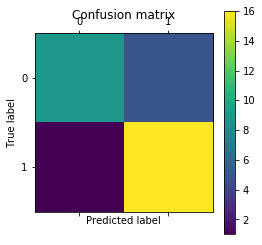



             precision    recall  f1-score   support

          0       0.90      0.64      0.75        14
          1       0.76      0.94      0.84        17

avg / total       0.82      0.81      0.80        31



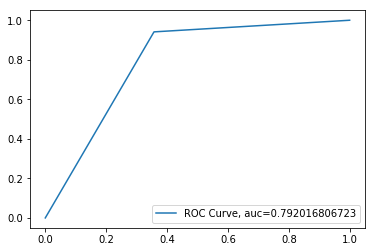

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  auto
Accuracy: 0.709677419355
[[ 9  5]
 [ 4 13]]


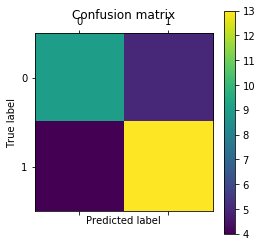



             precision    recall  f1-score   support

          0       0.69      0.64      0.67        14
          1       0.72      0.76      0.74        17

avg / total       0.71      0.71      0.71        31



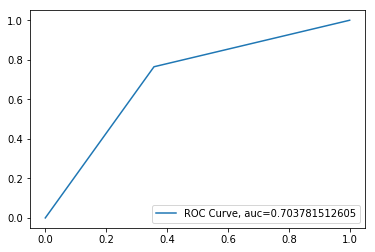

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  log2
Accuracy: 0.548387096774
[[ 2 12]
 [ 2 15]]


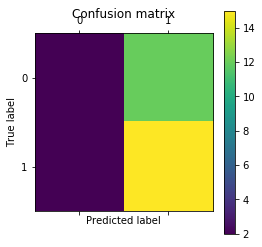



             precision    recall  f1-score   support

          0       0.50      0.14      0.22        14
          1       0.56      0.88      0.68        17

avg / total       0.53      0.55      0.47        31



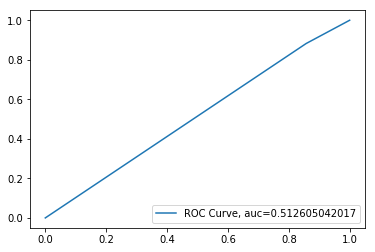

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  2
Accuracy: 0.645161290323
[[ 6  8]
 [ 3 14]]


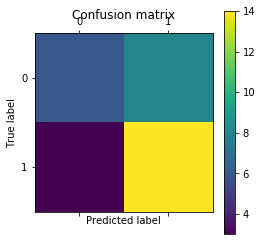



             precision    recall  f1-score   support

          0       0.67      0.43      0.52        14
          1       0.64      0.82      0.72        17

avg / total       0.65      0.65      0.63        31



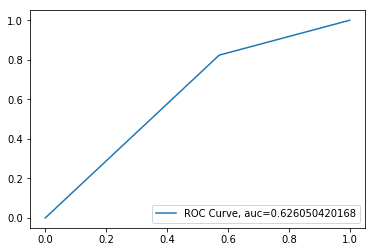

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  3
Accuracy: 0.774193548387
[[10  4]
 [ 3 14]]


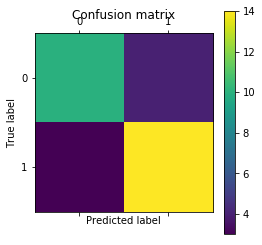



             precision    recall  f1-score   support

          0       0.77      0.71      0.74        14
          1       0.78      0.82      0.80        17

avg / total       0.77      0.77      0.77        31



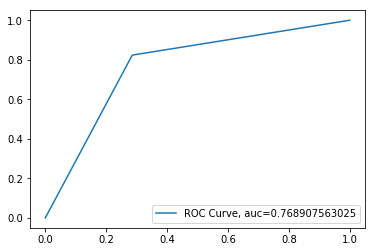

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  auto
Accuracy: 0.548387096774
[[ 3 11]
 [ 3 14]]


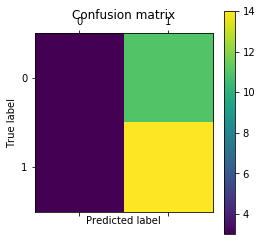



             precision    recall  f1-score   support

          0       0.50      0.21      0.30        14
          1       0.56      0.82      0.67        17

avg / total       0.53      0.55      0.50        31



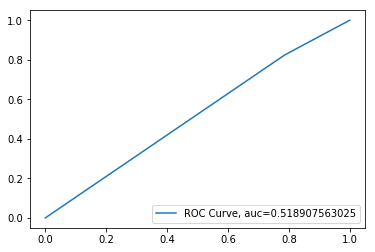

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  log2
Accuracy: 0.548387096774
[[ 6  8]
 [ 6 11]]


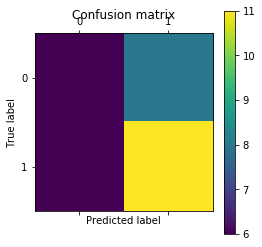



             precision    recall  f1-score   support

          0       0.50      0.43      0.46        14
          1       0.58      0.65      0.61        17

avg / total       0.54      0.55      0.54        31



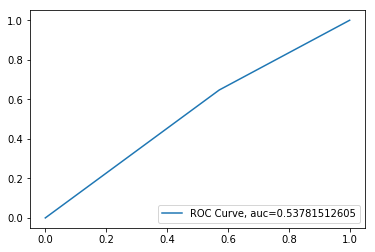

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  2
Accuracy: 0.612903225806
[[ 5  9]
 [ 3 14]]


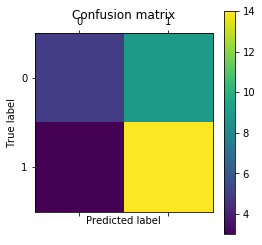



             precision    recall  f1-score   support

          0       0.62      0.36      0.45        14
          1       0.61      0.82      0.70        17

avg / total       0.62      0.61      0.59        31



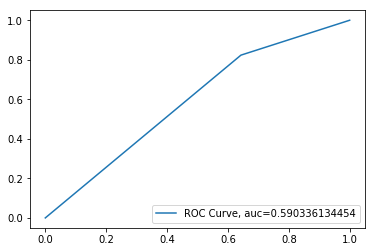

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  3
Accuracy: 0.612903225806
[[ 4 10]
 [ 2 15]]


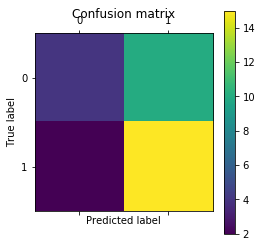



             precision    recall  f1-score   support

          0       0.67      0.29      0.40        14
          1       0.60      0.88      0.71        17

avg / total       0.63      0.61      0.57        31



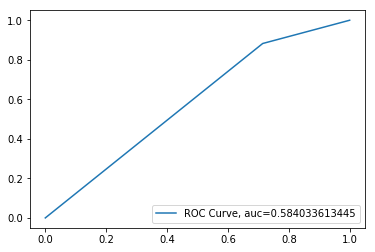

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  auto
Accuracy: 0.677419354839
[[ 6  8]
 [ 2 15]]


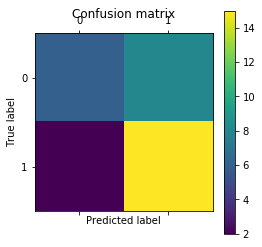



             precision    recall  f1-score   support

          0       0.75      0.43      0.55        14
          1       0.65      0.88      0.75        17

avg / total       0.70      0.68      0.66        31



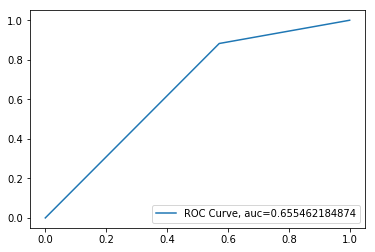

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  log2
Accuracy: 0.741935483871
[[ 7  7]
 [ 1 16]]


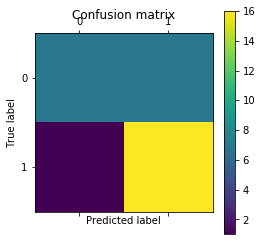



             precision    recall  f1-score   support

          0       0.88      0.50      0.64        14
          1       0.70      0.94      0.80        17

avg / total       0.78      0.74      0.73        31



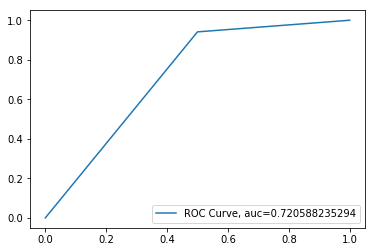

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  2
Accuracy: 0.58064516129
[[ 6  8]
 [ 5 12]]


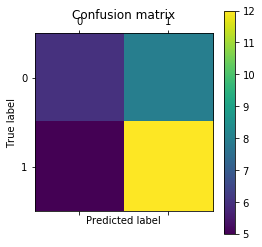



             precision    recall  f1-score   support

          0       0.55      0.43      0.48        14
          1       0.60      0.71      0.65        17

avg / total       0.58      0.58      0.57        31



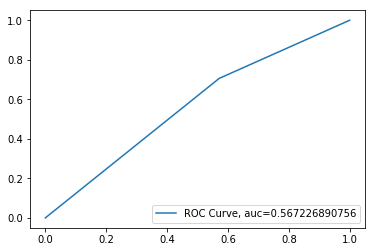

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  3
Accuracy: 0.677419354839
[[ 7  7]
 [ 3 14]]


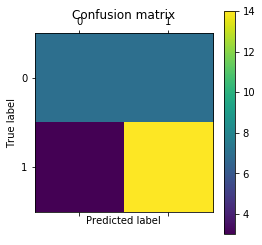



             precision    recall  f1-score   support

          0       0.70      0.50      0.58        14
          1       0.67      0.82      0.74        17

avg / total       0.68      0.68      0.67        31



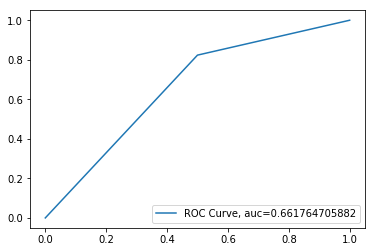

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  auto
Accuracy: 0.612903225806
[[ 4 10]
 [ 2 15]]


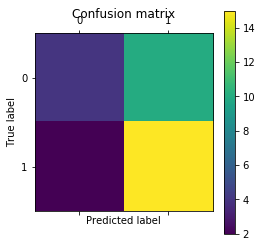



             precision    recall  f1-score   support

          0       0.67      0.29      0.40        14
          1       0.60      0.88      0.71        17

avg / total       0.63      0.61      0.57        31



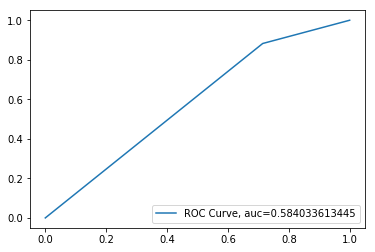

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  log2
Accuracy: 0.58064516129
[[ 6  8]
 [ 5 12]]


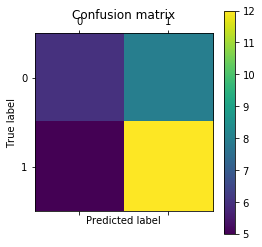



             precision    recall  f1-score   support

          0       0.55      0.43      0.48        14
          1       0.60      0.71      0.65        17

avg / total       0.58      0.58      0.57        31



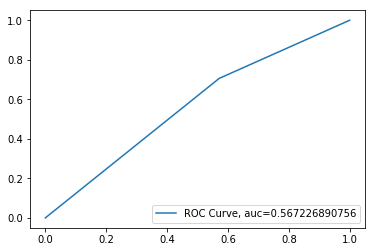

In [94]:
criteria = ['gini', 'entropy']
splitr = ['best', 'random']
weight = ['balanced']
feature = [2,3, 'auto', 'log2']
for i in criteria:
    for j in splitr:
        for k in weight:
            for l in feature:
                classifier = DecisionTreeClassifier(criterion =i,splitter=j ,class_weight=k, max_features =l)  
                classifier.fit(hp_xtrn, hp_ytrain) 
                y_pred = classifier.predict(hp_xtst)  
                print("Decision Tree : when  criteria = ", i,", splitter = ",j, ", class_weight = ", k,", max_features = ", l)
                print("Accuracy:",metrics.accuracy_score(hp_ytest, y_pred))
                cm = confusion_matrix(hp_ytest, y_pred)
                print(cm)
                plt.matshow(cm)
                plt.title('Confusion matrix')
                plt.colorbar()
                plt.ylabel('True label')
                plt.xlabel('Predicted label')
                plt.show()
                print('\n')
                
                print(classification_report(hp_ytest, y_pred))
                fpr, tpr, thresholds = roc_curve(hp_ytest, y_pred)
                auc = roc_auc_score(hp_ytest, y_pred)
                plt.plot(fpr,tpr,label="ROC Curve, auc="+str(auc))
                plt.legend(loc=4)
                plt.show()
                
                
                
        

# Applying Decision Tree  after StratifiedShuffleSplit

In [60]:
classifiers = {'DTree: ':DecisionTreeClassifier(),'DTree Random':DecisionTreeClassifier(random_state = 2), 'DTree Criteria':DecisionTreeClassifier(criterion = 'entropy')}

In [61]:
log_cols = ["Classifier", "Accuracy","Precision","Recall","ROC Score","F1-Score", "CV Score"]
log = pd.DataFrame(columns=log_cols)
sss = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 3)
sss.get_n_splits(train_data, test_data)
for Name,classify in classifiers.items():
    for train_index, test_index in sss.split(train_data, test_data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = train_data.iloc[train_index], train_data.iloc[test_index]
        y,y_test = test_data.iloc[train_index], test_data.iloc[test_index]
               
        cls = classify
        cls.fit(X, y)
        scores = cross_val_score(cls,X, y, cv=10)
        cv_score = max(scores)
        y_out = cls.predict(X_test)
        accuracy = metrics.accuracy_score(y_test,y_out)
        precision = metrics.precision_score(y_test,y_out,average='weighted')
        recall = metrics.recall_score(y_test,y_out,average='weighted')
        roc_auc = roc_auc_score(y_test,y_out)
        f1_score = metrics.f1_score(y_test,y_out,average='weighted')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,roc_auc,f1_score,cv_score]], columns=log_cols)
        log = log.append(log_entry)

In [62]:
log

,Classifier,Accuracy,Precision,Recall,ROC Score,F1-Score,CV Score
0,DTree:,0.838710,0.829529,0.838710,0.710000,0.832960,0.846154
0,DTree:,0.870968,0.870968,0.870968,0.793333,0.870968,0.909091
0,DTree:,0.741935,0.773843,0.741935,0.650000,0.754992,0.916667
0,DTree:,0.774194,0.759801,0.774194,0.606667,0.766143,0.916667
0,DTree:,0.774194,0.819159,0.774194,0.733333,0.789568,1.000000
0,DTree Random,0.870968,0.870968,0.870968,0.793333,0.870968,0.846154
0,DTree Random,0.870968,0.870968,0.870968,0.793333,0.870968,0.818182
0,DTree Random,0.741935,0.773843,0.741935,0.650000,0.754992,0.916667
0,DTree Random,0.838710,0.829529,0.838710,0.710000,0.832960,0.916667
0,DTree Random,0.838710,0.849846,0.838710,0.773333,0.843267,1.000000


# Applying Decision Tree  after ShuffleSplit

In [63]:
ss = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 3)
ss.get_n_splits(train_data, test_data)
log_ss = pd.DataFrame(columns=log_cols)
for Name,classify in classifiers.items():
    for train_index, test_index in ss.split(train_data, test_data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = train_data.iloc[train_index], train_data.iloc[test_index]
        y,y_test = test_data.iloc[train_index], test_data.iloc[test_index]
               
        cls = classify
        cls.fit(X, y)
        scores = cross_val_score(cls,X, y, cv=10)
        cv_score = max(scores)
        y_out = cls.predict(X_test)
        accuracy = metrics.accuracy_score(y_test,y_out)
        precision = metrics.precision_score(y_test,y_out,average='weighted')
        recall = metrics.recall_score(y_test,y_out,average='weighted')
        roc_auc = roc_auc_score(y_test,y_out)
        f1_score = metrics.f1_score(y_test,y_out,average='weighted')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,roc_auc,f1_score,cv_score]], columns=log_cols)
        log_ss = log_ss.append(log_entry)

In [64]:
log_ss

,Classifier,Accuracy,Precision,Recall,ROC Score,F1-Score,CV Score
0,DTree:,0.838710,0.831828,0.838710,0.744048,0.834152,0.916667
0,DTree:,0.612903,0.612903,0.612903,0.446429,0.612903,0.923077
0,DTree:,0.870968,0.865509,0.870968,0.764881,0.862796,0.916667
0,DTree:,0.838710,0.820276,0.838710,0.646667,0.816393,0.923077
0,DTree:,0.806452,0.790571,0.806452,0.672619,0.794194,0.909091
0,DTree Random,0.870968,0.865509,0.870968,0.764881,0.862796,0.916667
0,DTree Random,0.774194,0.743728,0.774194,0.601190,0.750043,0.923077
0,DTree Random,0.774194,0.786115,0.774194,0.702381,0.779318,0.846154
0,DTree Random,0.806452,0.783751,0.806452,0.626667,0.790819,0.923077
0,DTree Random,0.806452,0.790571,0.806452,0.672619,0.794194,0.916667


# Applying Decision Tree  after KFold

In [67]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True ,random_state = 3)
kfold.get_n_splits(train_data, test_data)
log_kf = pd.DataFrame(columns=log_cols)
for Name,classify in classifiers.items():
    for train_index, test_index in kfold.split(train_data, test_data):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = train_data.iloc[train_index], train_data.iloc[test_index]
        y,y_test = test_data.iloc[train_index], test_data.iloc[test_index]
               
        cls = classify
        cls.fit(X, y)
        scores = cross_val_score(cls,X, y, cv=10)
        cv_score = max(scores)
        y_out = cls.predict(X_test)
        accuracy = metrics.accuracy_score(y_test,y_out)
        precision = metrics.precision_score(y_test,y_out,average='weighted')
        recall = metrics.recall_score(y_test,y_out,average='weighted')
        roc_auc = roc_auc_score(y_test,y_out)
        f1_score = metrics.f1_score(y_test,y_out,average='weighted')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,roc_auc,f1_score,cv_score]], columns=log_cols)
        log_kf = log_kf.append(log_entry)

In [68]:
log_kf

,Classifier,Accuracy,Precision,Recall,ROC Score,F1-Score,CV Score
0,DTree:,0.806452,0.790571,0.806452,0.672619,0.794194,1.000000
0,DTree:,0.774194,0.802867,0.774194,0.428571,0.788270,0.916667
0,DTree:,0.806452,0.829260,0.806452,0.773810,0.814341,0.916667
0,DTree:,0.774194,0.765745,0.774194,0.684783,0.769069,1.000000
0,DTree:,0.709677,0.724229,0.709677,0.610119,0.716266,0.916667
0,DTree Random,0.870968,0.865509,0.870968,0.764881,0.862796,1.000000
0,DTree Random,0.774194,0.802867,0.774194,0.428571,0.788270,0.916667
0,DTree Random,0.806452,0.829260,0.806452,0.773810,0.814341,0.916667
0,DTree Random,0.774194,0.765745,0.774194,0.684783,0.769069,1.000000
0,DTree Random,0.709677,0.724229,0.709677,0.610119,0.716266,1.000000


# GetDummies and Decision Tree 

In [69]:
data_new = pd.get_dummies(df, columns=['sex','steroid','antivirals','fatigue',
                                         'malaise','anorexia',
                                         'liver_big','liver_firm',
                                         'spleen_palpable','spiders',
                                         'ascites','varices','histology' ])

In [70]:
data_new.head()

,age,bilirubin,alk_phosphate,sgot,albumin,protime,class,sex_0,sex_1,steroid_0,...,spleen_palpable_0,spleen_palpable_1,spiders_0,spiders_1,ascites_0,ascites_1,varices_0,varices_1,histology_0,histology_1
0,30,1.0,85.000000,18.0,4.0,61.852273,1,0,1,1,...,1,0,1,0,1,0,1,0,1,0
1,50,0.9,135.000000,42.0,3.5,61.852273,1,1,0,1,...,1,0,1,0,1,0,1,0,1,0
2,78,0.7,96.000000,32.0,4.0,61.852273,1,1,0,0,...,1,0,1,0,1,0,1,0,1,0
3,31,0.7,46.000000,52.0,4.0,80.000000,1,1,0,0,...,1,0,1,0,1,0,1,0,1,0
4,34,1.0,105.325397,200.0,4.0,61.852273,1,1,0,0,...,1,0,1,0,1,0,1,0,1,0


In [95]:
data_y = pd.DataFrame(data_new['class'])
data_X = data_new.drop(['class'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.2)



Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  2
Accuracy: 0.741935483871
[[ 2  4]
 [ 4 21]]


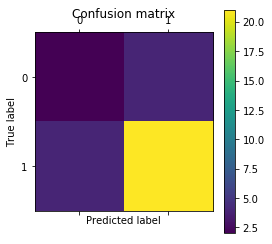



             precision    recall  f1-score   support

          0       0.33      0.33      0.33         6
          1       0.84      0.84      0.84        25

avg / total       0.74      0.74      0.74        31



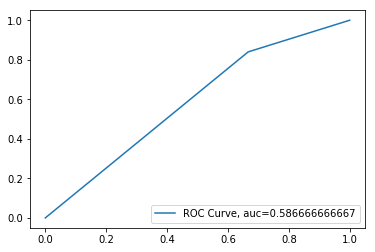

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  3
Accuracy: 0.870967741935
[[ 5  1]
 [ 3 22]]


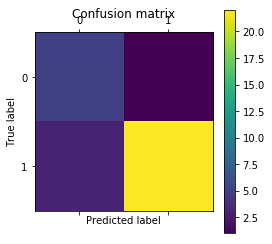



             precision    recall  f1-score   support

          0       0.62      0.83      0.71         6
          1       0.96      0.88      0.92        25

avg / total       0.89      0.87      0.88        31



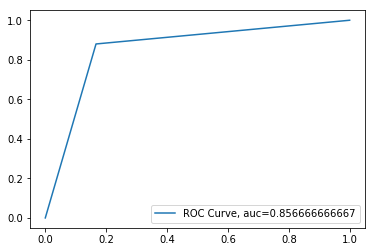

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  auto
Accuracy: 0.741935483871
[[ 2  4]
 [ 4 21]]


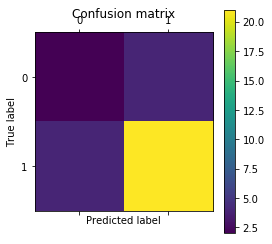



             precision    recall  f1-score   support

          0       0.33      0.33      0.33         6
          1       0.84      0.84      0.84        25

avg / total       0.74      0.74      0.74        31



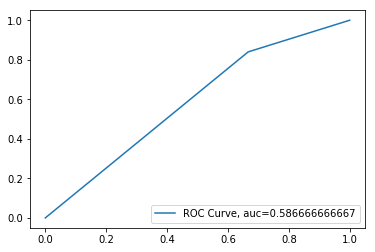

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  log2
Accuracy: 0.806451612903
[[ 3  3]
 [ 3 22]]


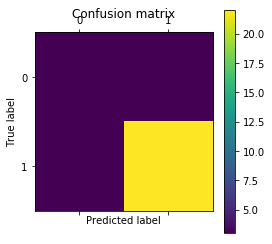



             precision    recall  f1-score   support

          0       0.50      0.50      0.50         6
          1       0.88      0.88      0.88        25

avg / total       0.81      0.81      0.81        31



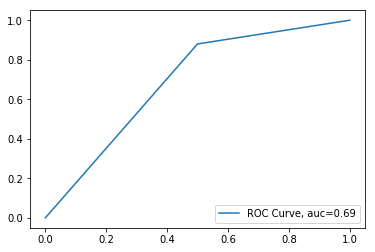

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  2
Accuracy: 0.903225806452
[[ 5  1]
 [ 2 23]]


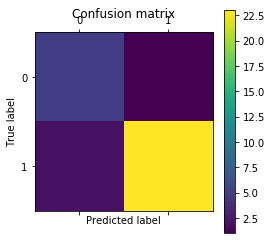



             precision    recall  f1-score   support

          0       0.71      0.83      0.77         6
          1       0.96      0.92      0.94        25

avg / total       0.91      0.90      0.91        31



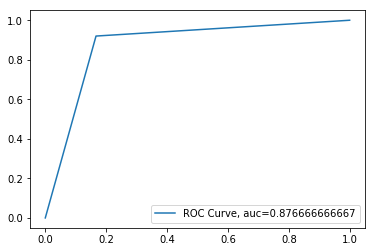

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  3
Accuracy: 0.806451612903
[[ 3  3]
 [ 3 22]]


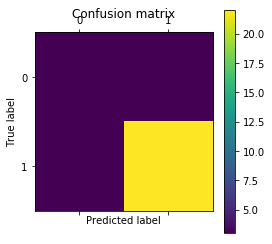



             precision    recall  f1-score   support

          0       0.50      0.50      0.50         6
          1       0.88      0.88      0.88        25

avg / total       0.81      0.81      0.81        31



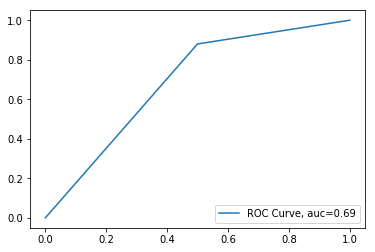

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  auto
Accuracy: 0.838709677419
[[ 2  4]
 [ 1 24]]


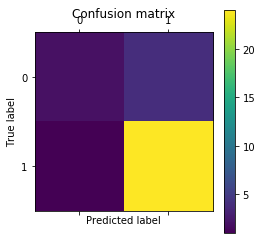



             precision    recall  f1-score   support

          0       0.67      0.33      0.44         6
          1       0.86      0.96      0.91        25

avg / total       0.82      0.84      0.82        31



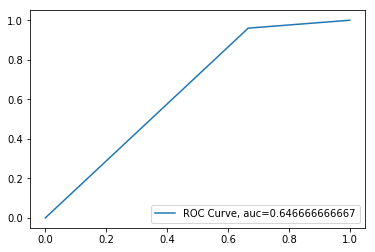

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  log2
Accuracy: 0.838709677419
[[ 3  3]
 [ 2 23]]


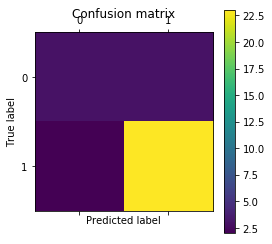



             precision    recall  f1-score   support

          0       0.60      0.50      0.55         6
          1       0.88      0.92      0.90        25

avg / total       0.83      0.84      0.83        31



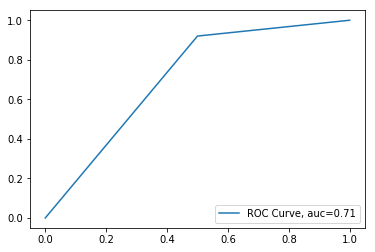

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  2
Accuracy: 0.903225806452
[[ 5  1]
 [ 2 23]]


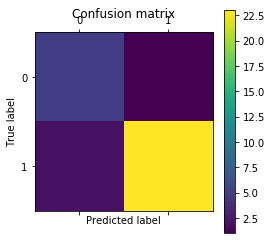



             precision    recall  f1-score   support

          0       0.71      0.83      0.77         6
          1       0.96      0.92      0.94        25

avg / total       0.91      0.90      0.91        31



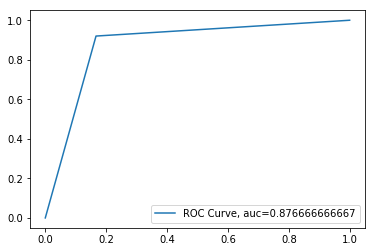

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  3
Accuracy: 0.806451612903
[[ 5  1]
 [ 5 20]]


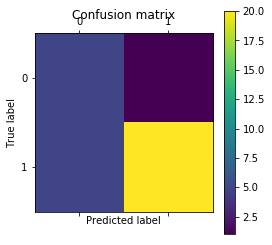



             precision    recall  f1-score   support

          0       0.50      0.83      0.62         6
          1       0.95      0.80      0.87        25

avg / total       0.86      0.81      0.82        31



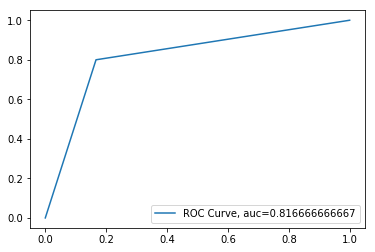

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  auto
Accuracy: 0.774193548387
[[ 2  4]
 [ 3 22]]


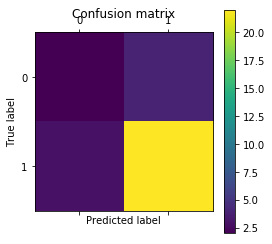



             precision    recall  f1-score   support

          0       0.40      0.33      0.36         6
          1       0.85      0.88      0.86        25

avg / total       0.76      0.77      0.77        31



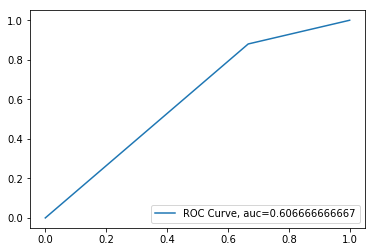

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  log2
Accuracy: 0.709677419355
[[ 2  4]
 [ 5 20]]


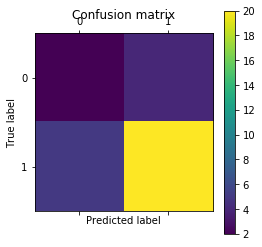



             precision    recall  f1-score   support

          0       0.29      0.33      0.31         6
          1       0.83      0.80      0.82        25

avg / total       0.73      0.71      0.72        31



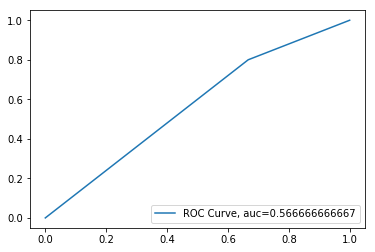

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  2
Accuracy: 0.774193548387
[[ 3  3]
 [ 4 21]]


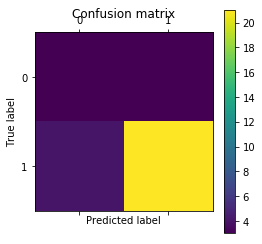



             precision    recall  f1-score   support

          0       0.43      0.50      0.46         6
          1       0.88      0.84      0.86        25

avg / total       0.79      0.77      0.78        31



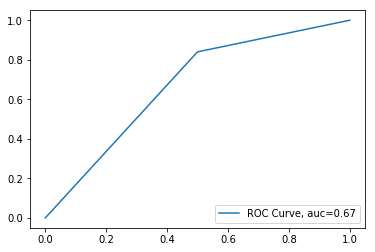

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  3
Accuracy: 0.709677419355
[[ 2  4]
 [ 5 20]]


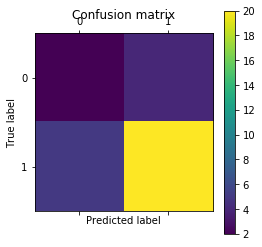



             precision    recall  f1-score   support

          0       0.29      0.33      0.31         6
          1       0.83      0.80      0.82        25

avg / total       0.73      0.71      0.72        31



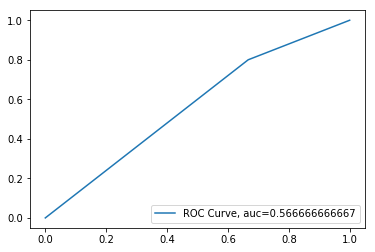

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  auto
Accuracy: 0.806451612903
[[ 5  1]
 [ 5 20]]


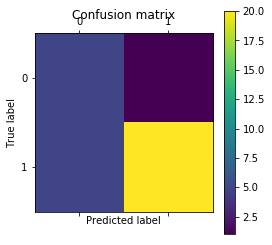



             precision    recall  f1-score   support

          0       0.50      0.83      0.62         6
          1       0.95      0.80      0.87        25

avg / total       0.86      0.81      0.82        31



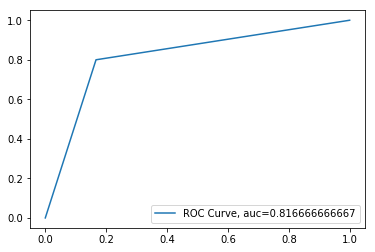

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  log2
Accuracy: 0.903225806452
[[ 4  2]
 [ 1 24]]


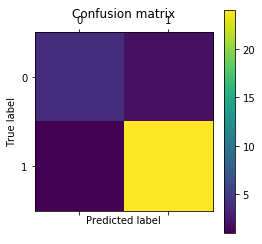



             precision    recall  f1-score   support

          0       0.80      0.67      0.73         6
          1       0.92      0.96      0.94        25

avg / total       0.90      0.90      0.90        31



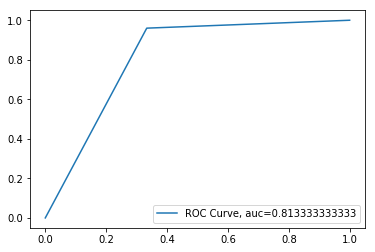

In [96]:
criteria = ['gini', 'entropy']
splitr = ['best', 'random']
weight = ['balanced']
feature = [2,3, 'auto', 'log2']
for i in criteria:
    for j in splitr:
        for k in weight:
            for l in feature:
                classifier = DecisionTreeClassifier(criterion =i,splitter=j ,class_weight=k, max_features =l)  
                classifier.fit(X_train, y_train) 
                y_pred = classifier.predict(X_test)  
                print("Decision Tree : when  criteria = ", i,", splitter = ",j, ", class_weight = ", k,", max_features = ", l)
                print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
                cm = confusion_matrix(y_test, y_pred)
                print(cm)
                plt.matshow(cm)
                plt.title('Confusion matrix')
                plt.colorbar()
                plt.ylabel('True label')
                plt.xlabel('Predicted label')
                plt.show()
                print('\n')
                
                print(classification_report(y_test, y_pred))
                fpr, tpr, thresholds = roc_curve(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred)
                plt.plot(fpr,tpr,label="ROC Curve, auc="+str(auc))
                plt.legend(loc=4)
                plt.show()
                
                
        

# StandardScaler

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_trn_n=scaler.transform(X_train)
x_tst_n=scaler.transform(X_test)

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  2
Accuracy: 0.774193548387
[[ 3  3]
 [ 4 21]]


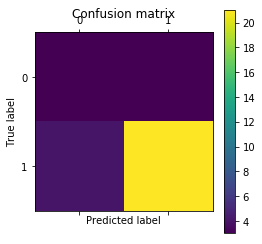



             precision    recall  f1-score   support

          0       0.43      0.50      0.46         6
          1       0.88      0.84      0.86        25

avg / total       0.79      0.77      0.78        31



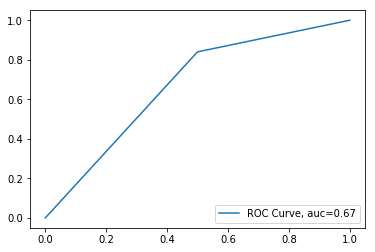

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  3
Accuracy: 0.838709677419
[[ 6  0]
 [ 5 20]]


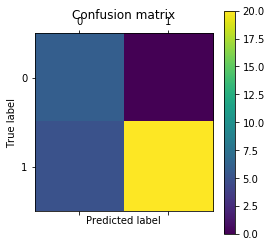



             precision    recall  f1-score   support

          0       0.55      1.00      0.71         6
          1       1.00      0.80      0.89        25

avg / total       0.91      0.84      0.85        31



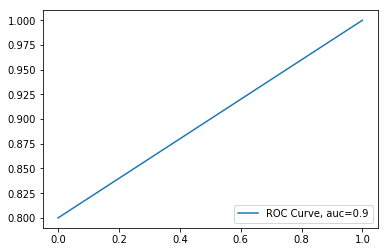

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  auto
Accuracy: 0.806451612903
[[ 3  3]
 [ 3 22]]


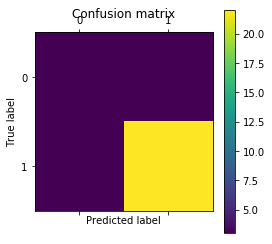



             precision    recall  f1-score   support

          0       0.50      0.50      0.50         6
          1       0.88      0.88      0.88        25

avg / total       0.81      0.81      0.81        31



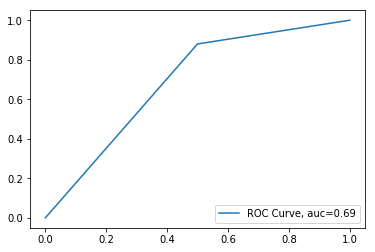

Decision Tree : when  criteria =  gini , splitter =  best , class_weight =  balanced , max_features =  log2
Accuracy: 0.967741935484
[[ 6  0]
 [ 1 24]]


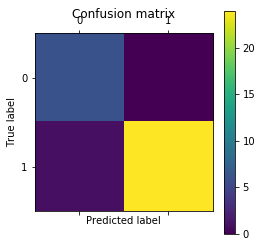



             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      0.96      0.98        25

avg / total       0.97      0.97      0.97        31



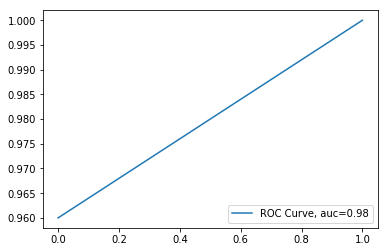

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  2
Accuracy: 0.774193548387
[[ 5  1]
 [ 6 19]]


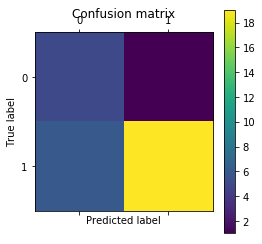



             precision    recall  f1-score   support

          0       0.45      0.83      0.59         6
          1       0.95      0.76      0.84        25

avg / total       0.85      0.77      0.79        31



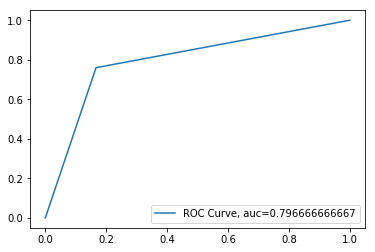

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  3
Accuracy: 0.903225806452
[[ 4  2]
 [ 1 24]]


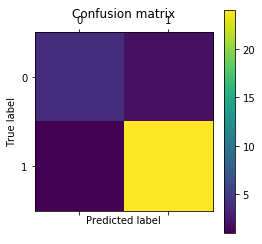



             precision    recall  f1-score   support

          0       0.80      0.67      0.73         6
          1       0.92      0.96      0.94        25

avg / total       0.90      0.90      0.90        31



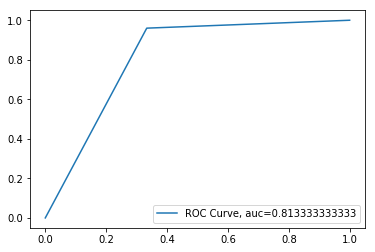

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  auto
Accuracy: 0.870967741935
[[ 4  2]
 [ 2 23]]


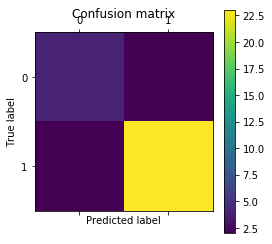



             precision    recall  f1-score   support

          0       0.67      0.67      0.67         6
          1       0.92      0.92      0.92        25

avg / total       0.87      0.87      0.87        31



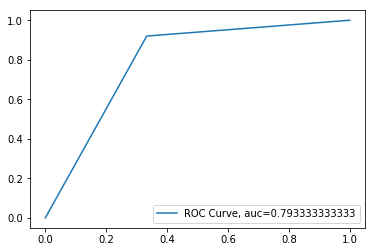

Decision Tree : when  criteria =  gini , splitter =  random , class_weight =  balanced , max_features =  log2
Accuracy: 0.838709677419
[[ 5  1]
 [ 4 21]]


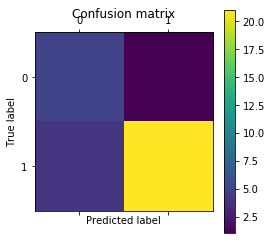



             precision    recall  f1-score   support

          0       0.56      0.83      0.67         6
          1       0.95      0.84      0.89        25

avg / total       0.88      0.84      0.85        31



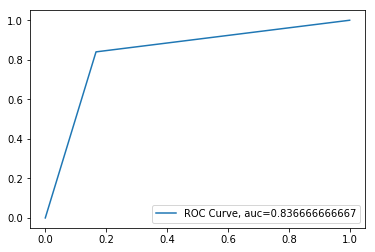

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  2
Accuracy: 0.741935483871
[[ 1  5]
 [ 3 22]]


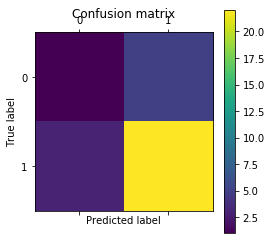



             precision    recall  f1-score   support

          0       0.25      0.17      0.20         6
          1       0.81      0.88      0.85        25

avg / total       0.71      0.74      0.72        31



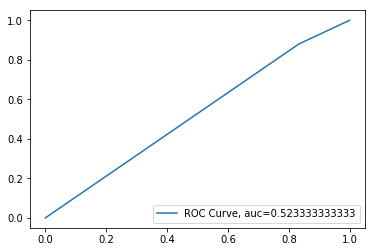

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  3
Accuracy: 0.838709677419
[[ 4  2]
 [ 3 22]]


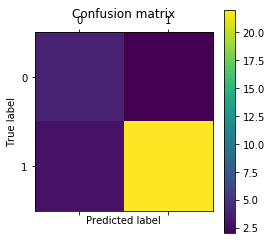



             precision    recall  f1-score   support

          0       0.57      0.67      0.62         6
          1       0.92      0.88      0.90        25

avg / total       0.85      0.84      0.84        31



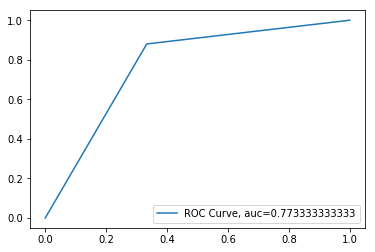

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  auto
Accuracy: 0.870967741935
[[ 5  1]
 [ 3 22]]


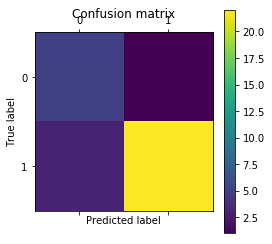



             precision    recall  f1-score   support

          0       0.62      0.83      0.71         6
          1       0.96      0.88      0.92        25

avg / total       0.89      0.87      0.88        31



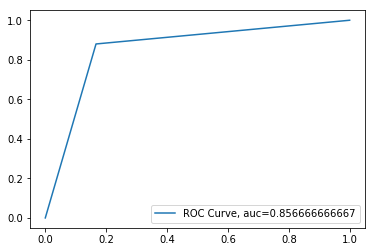

Decision Tree : when  criteria =  entropy , splitter =  best , class_weight =  balanced , max_features =  log2
Accuracy: 0.870967741935
[[ 4  2]
 [ 2 23]]


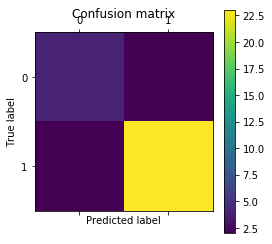



             precision    recall  f1-score   support

          0       0.67      0.67      0.67         6
          1       0.92      0.92      0.92        25

avg / total       0.87      0.87      0.87        31



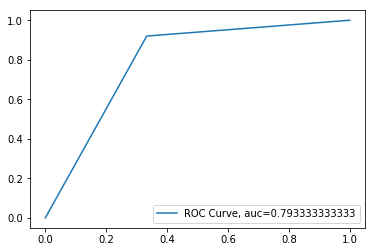

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  2
Accuracy: 0.838709677419
[[ 3  3]
 [ 2 23]]


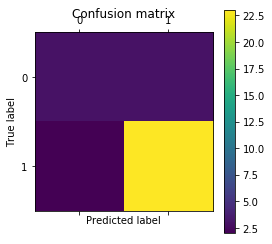



             precision    recall  f1-score   support

          0       0.60      0.50      0.55         6
          1       0.88      0.92      0.90        25

avg / total       0.83      0.84      0.83        31



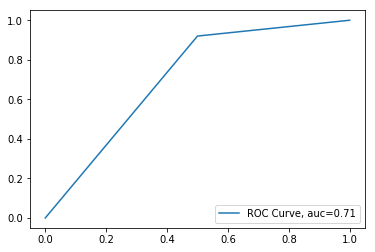

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  3
Accuracy: 0.903225806452
[[ 6  0]
 [ 3 22]]


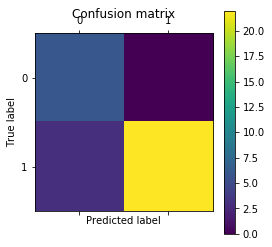



             precision    recall  f1-score   support

          0       0.67      1.00      0.80         6
          1       1.00      0.88      0.94        25

avg / total       0.94      0.90      0.91        31



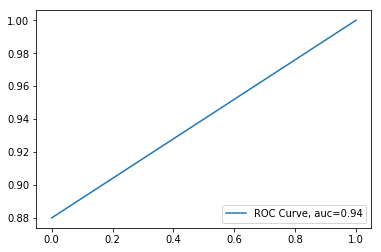

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  auto
Accuracy: 0.709677419355
[[ 3  3]
 [ 6 19]]


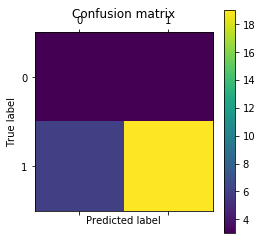



             precision    recall  f1-score   support

          0       0.33      0.50      0.40         6
          1       0.86      0.76      0.81        25

avg / total       0.76      0.71      0.73        31



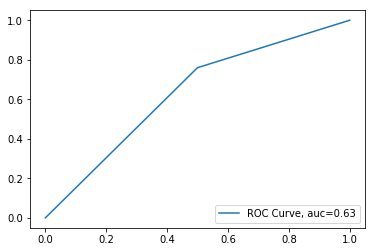

Decision Tree : when  criteria =  entropy , splitter =  random , class_weight =  balanced , max_features =  log2
Accuracy: 0.838709677419
[[ 3  3]
 [ 2 23]]


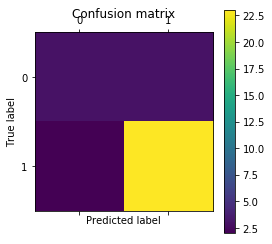



             precision    recall  f1-score   support

          0       0.60      0.50      0.55         6
          1       0.88      0.92      0.90        25

avg / total       0.83      0.84      0.83        31



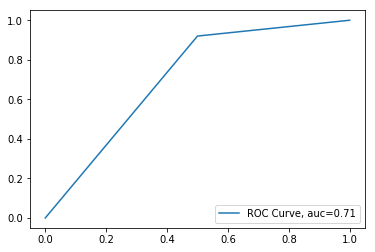

In [98]:
criteria = ['gini', 'entropy']
splitr = ['best', 'random']
weight = ['balanced']
feature = [2,3, 'auto', 'log2']
for i in criteria:
    for j in splitr:
        for k in weight:
            for l in feature:
                classifier = DecisionTreeClassifier(criterion =i,splitter=j ,class_weight=k, max_features =l)  
                classifier.fit(x_trn_n, y_train) 
                y_pred = classifier.predict(x_tst_n)  
                print("Decision Tree : when  criteria = ", i,", splitter = ",j, ", class_weight = ", k,", max_features = ", l)
                print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
                cm = confusion_matrix(y_test, y_pred)
                print(cm)
                plt.matshow(cm)
                plt.title('Confusion matrix')
                plt.colorbar()
                plt.ylabel('True label')
                plt.xlabel('Predicted label')
                plt.show()
                print('\n')
                
                print(classification_report(y_test, y_pred))
                fpr, tpr, thresholds = roc_curve(y_test, y_pred)
                auc = roc_auc_score(y_test, y_pred)
                plt.plot(fpr,tpr,label="ROC Curve, auc="+str(auc))
                plt.legend(loc=4)
                plt.show()
                
        